# 02.05 Random Walk

A random walk is a mathematical concept where random steps are performed repeatedly.
Each step consist of adding a random number the the current cumulative sum of all previous steps.
Variants of the random walk allow the random numbers to be units (-1 or 1), floating points,
limited within a range, and/or taken from a distribution.

Several stochastic processes can be modeled through a random walk,
notably processes seen in nature.
We will simulate a handful of random walks and get a hang of vectorized computing
and simple plotting in the process.

The `pyplot` is an interface to many plotting facilities in `matplotlib`.
For now do not worry about the `%matplotlib inline` line.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

![Brownie](np-brownie.svg)

<div style="text-align:right;"><sup>np-brownie.svg</sup></div>

## Vectorized Summing

We generate a simple random walk by generating random numbers and summing them.

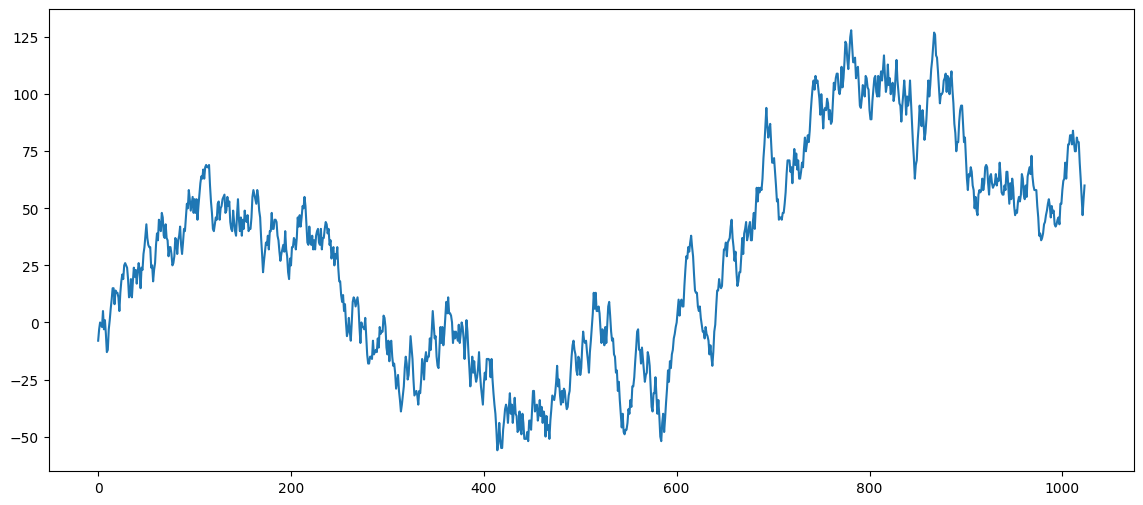

In [2]:
rng = np.random.default_rng(42)
steps = 1024
numbers = rng.integers(-9, 10, steps)
sums = numbers.cumsum()
plt.figure(figsize=(14, 6))
plt.plot(sums);

What we did is a loop without actually writing a loop: an aggregation.
Yet, we can do better.
If we generate a matrix of random numbers we can sum across columns,
and build several random walks at once.

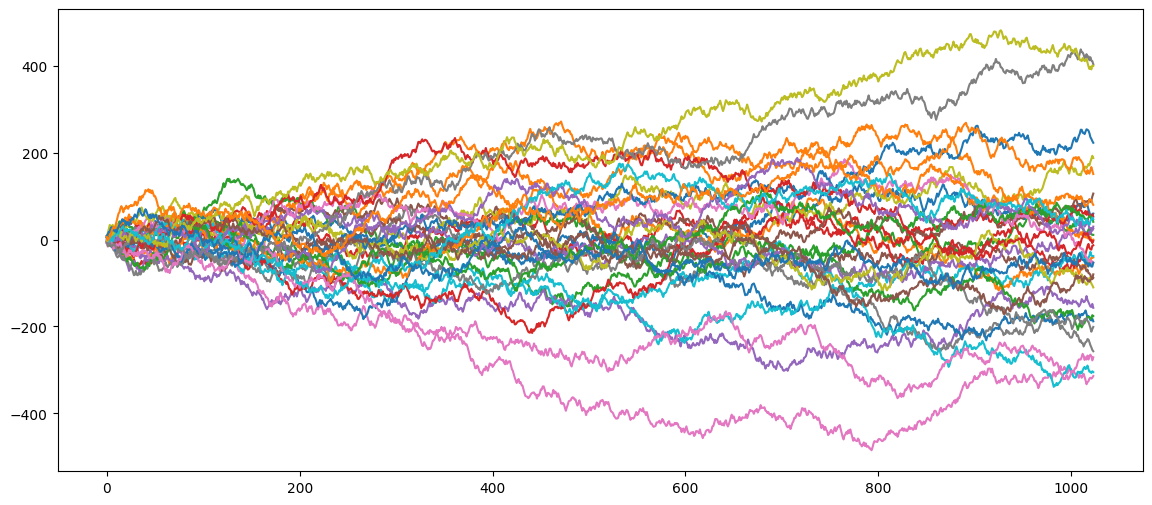

In [3]:
rng = np.random.default_rng(42)
steps = 1024
runs = 32
numbers = rng.integers(-9, 10, (runs, steps))
sums = numbers.cumsum(axis=1)
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

### Step by Step

That was a lot to take in, slow down.
Let's reduce the number of steps and walks and do an in-deep look at every piece of that code.

In [4]:
rng = np.random.default_rng(42)
steps = 6
runs = 3
numbers = rng.integers(-9, 10, (runs, steps))
numbers

array([[-8,  5,  3, -1, -1,  7],
       [-8,  4, -6, -8,  1,  9],
       [ 4,  5,  4,  5,  0, -7]])

We have three sets of random numbers, three rows in a matrix.

In [5]:
sums = numbers.cumsum(axis=1)
sums

array([[ -8,  -3,   0,  -1,  -2,   5],
       [ -8,  -4, -10, -18, -17,  -8],
       [  4,   9,  13,  18,  18,  11]])

`axis=1` means: perform the aggregation *across* columns.
Therefore we performed a cumulative sum inside each row,
we now have three random walks inside each row.

In [6]:
sums.T

array([[ -8,  -8,   4],
       [ -3,  -4,   9],
       [  0, -10,  13],
       [ -1, -18,  18],
       [ -2, -17,  18],
       [  5,  -8,  11]])

The plotting engine understands *columns* as separate functions,
therefore we need to transpose (`.T`) the matrix for plotting.
We only need to call `plt.figure` to parametrize the image, in this case its size, in inches.
The default size of the image is 5 by 5 inches, which is quite small for most uses.

Note: The notebook main area uses a resolution of 72 DPI (dots per inch).
Which means that its width resolution of 14-15 inches is just around 1024 pixels.
Any image bigger than that (in pixels or inches) will be scaled down,
and its aspect ratio adapted accordingly.

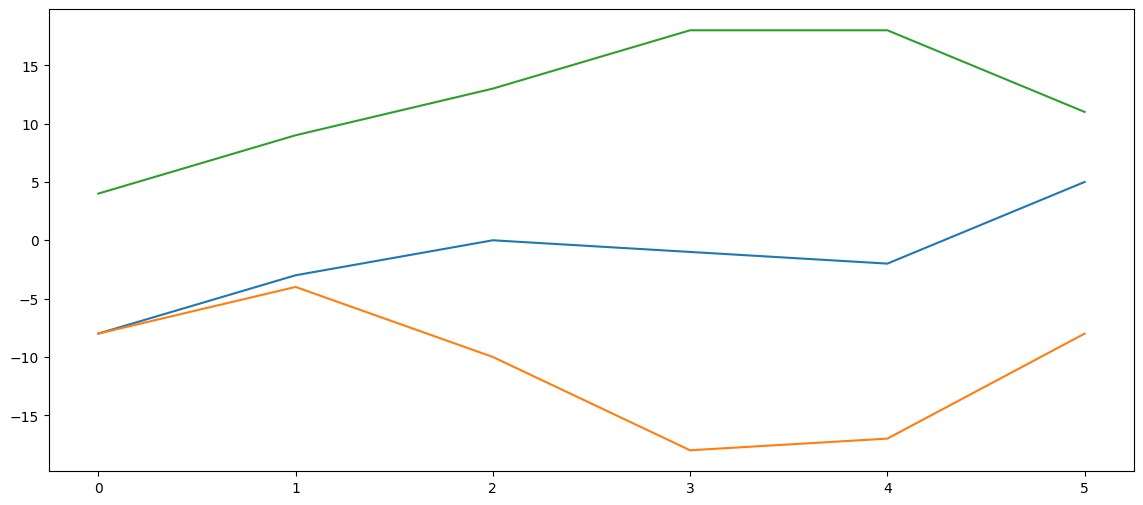

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

Let's go back to the full example.

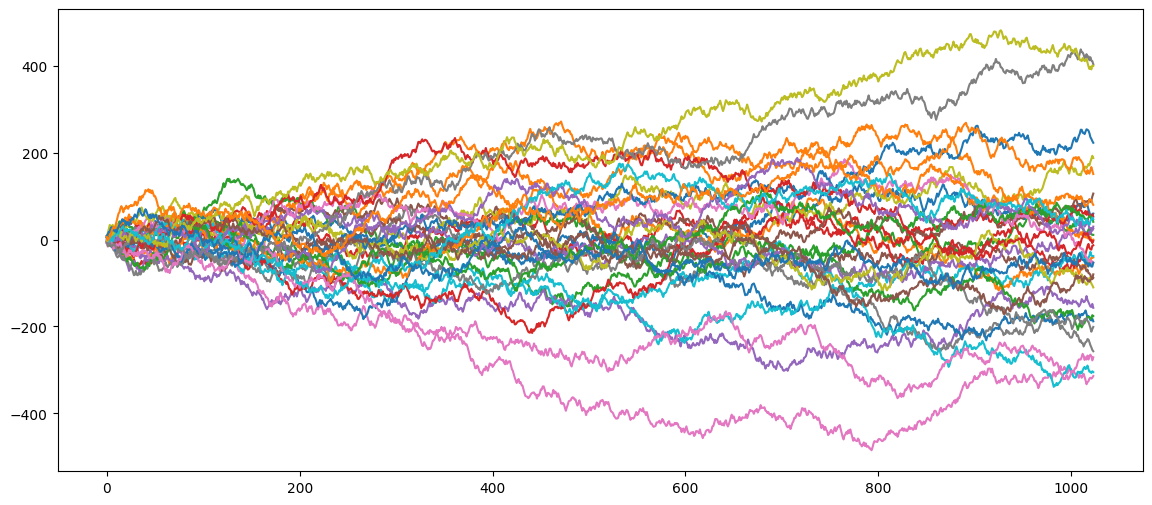

In [8]:
rng = np.random.default_rng(42)
steps = 1024
runs = 32
numbers = rng.integers(-9, 10, (runs, steps))
sums = numbers.cumsum(axis=1)
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

## Data Features

We can extract statistics (also called features) about the walks.
For example, the walk that reached the higher number at the end.

In [9]:
sums[:, -1].argmax()

np.int64(27)

Or the smallest value.

In [10]:
sums[:, -1].argmin()

np.int64(6)

How many walks turned on the positive side?

In [11]:
np.sum(sums[:, -1] > 0)

np.int64(14)

How many walks stray above 100 or below -100?

In [12]:
np.sum(np.abs(sums[:, -1]) > 100)

np.int64(15)

Which was the first walk to stray 100 (or -100) from the origin
(and did stay there)?

This is slightly more complicated because we want to consider only the walks that stray that much.
Also note that `argmax` (and `argmin`) will take the *first* maximum (or minimum) value in an array,
i.e. if there is more than a single maximum value.
In the case of a boolean array (as below) `argmax` will give the index of the first `True` value.

In [13]:
above = np.abs(sums[:, -1]) > 100
(np.abs(sums[above, :]) > 100).argmax(axis=1).argmin()

np.int64(14)

Let's have a look at that specific random walk.

In [14]:
sums[above, :][4, :128]

array([  4,   6,   7,   3,  -4,  -5, -10,  -9,  -3,  -2,   0,  -9,  -6,
        -7, -14, -19, -14,  -6,  -6,   3,  -3,  -7,   1,  -5,  -2,  -7,
       -10, -10, -13,  -6,   3,   3,   3,  -5, -10, -19, -12, -17, -20,
       -13,  -9,  -7, -16, -15, -14, -17, -12,  -4,  -9, -12, -15,  -9,
       -17,  -9,  -4,  -4,  -2,   5,  10,   6,  -3,   0,  -7, -15,  -6,
        -6,  -3,  -8, -16, -24, -27, -36, -38, -41, -40, -38, -42, -43,
       -51, -55, -46, -37, -37, -29, -29, -36, -29, -31, -29, -26, -30,
       -26, -26, -29, -33, -28, -33, -40, -33, -36, -33, -29, -23, -21,
       -17, -11,  -3, -12,  -7, -13,  -6, -15, -20, -26, -24, -33, -42,
       -42, -33, -32, -33, -30, -29, -31, -29, -38, -43, -40])

Pretty sensible, this random walk reaches 100 very quickly.

Another way to reach the same array is to calculate which row index inside `above`
corresponds to the row index inside `sums`.

In [15]:
idx = 4
sums[(above.cumsum() == (idx + 1)).argmax(), :128]

array([  4,   6,   7,   3,  -4,  -5, -10,  -9,  -3,  -2,   0,  -9,  -6,
        -7, -14, -19, -14,  -6,  -6,   3,  -3,  -7,   1,  -5,  -2,  -7,
       -10, -10, -13,  -6,   3,   3,   3,  -5, -10, -19, -12, -17, -20,
       -13,  -9,  -7, -16, -15, -14, -17, -12,  -4,  -9, -12, -15,  -9,
       -17,  -9,  -4,  -4,  -2,   5,  10,   6,  -3,   0,  -7, -15,  -6,
        -6,  -3,  -8, -16, -24, -27, -36, -38, -41, -40, -38, -42, -43,
       -51, -55, -46, -37, -37, -29, -29, -36, -29, -31, -29, -26, -30,
       -26, -26, -29, -33, -28, -33, -40, -33, -36, -33, -29, -23, -21,
       -17, -11,  -3, -12,  -7, -13,  -6, -15, -20, -26, -24, -33, -42,
       -42, -33, -32, -33, -30, -29, -31, -29, -38, -43, -40])

Can you figure out how this works?